In [7]:
import pandas as pd
import numpy as np
import pickle

In [8]:
casos = pd.read_pickle('casos_actualitzat.pkl')

In [9]:
with open('clustering/model_clustering_casos_actualitzat.pkl', 'rb') as arxiu:
    kmeans = pickle.load(arxiu)


In [10]:
X = np.vstack(np.array(casos.vector))


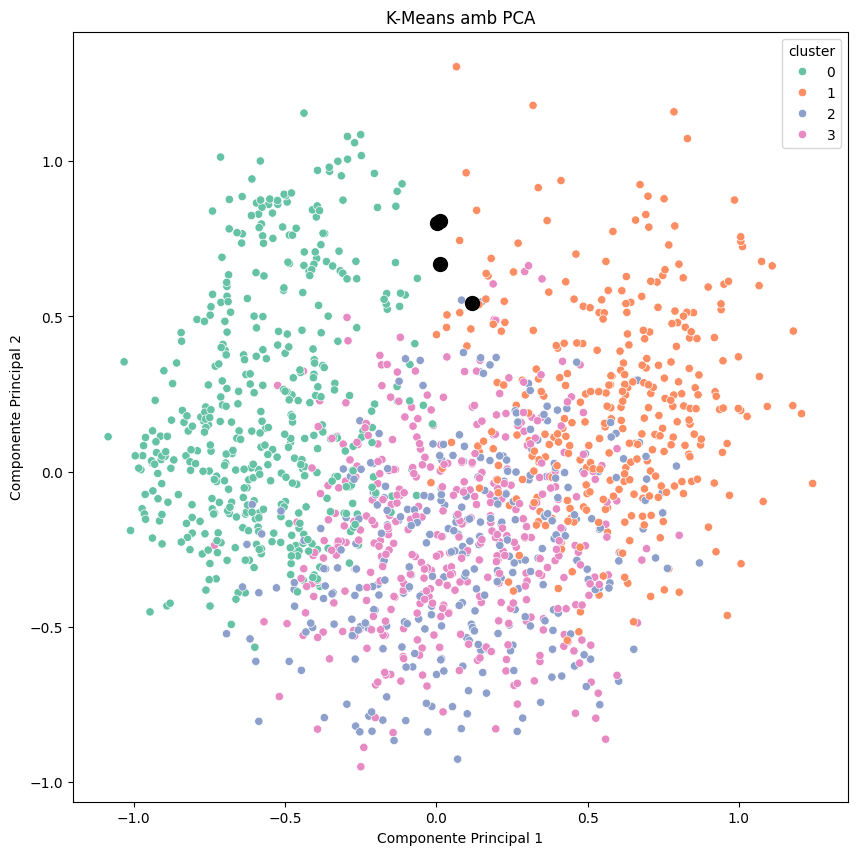

In [11]:
# Plot PCA 2d
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)
X_pca.shape

# Plot PCA 2d and centroids
labels = casos.cluster
plt.figure(figsize=(10, 10))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='Set2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids')
plt.title('K-Means amb PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.savefig('../plots/kmeans_pca_casos_actualitzada.png')